# Euler's Method

To solve $\frac{dY}{dt} = f(t, Y)$

we can use Euler's method, which is a simple numerical procedure to approximate solutions of ordinary differential equations (ODEs). The basic idea is to use the derivative information at a known point to estimate the value of the function at a subsequent point.

The formula for Euler's method is:

$$y_{n+1} = y_n + f(y_n, t_n) \cdot \Delta t$$

where:
- $y_n$ is the current value of the function
- $t_n$ is the current time
- $\Delta t$ is the step size
- $f(y_n, t_n)$ is the derivative at the current point

By iterating this process, we can build up a numerical solution to the ODE over a specified interval.

# This is the in-class demo for SIR model & Euler's method

We're going to implement the following simple recursion:

$$t_{n+1} = t_n + \Delta t$$
$$y_{n+1} = y_n + f(y_n, t_n) \cdot \Delta t$$

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def SIR(S0, I0, R0, beta, gamma, t_max, step_size):
    T = np.arange(0, t_max+step_size, step_size)
    S = np.zeros(len(T))
    I = np.zeros(len(T))
    R = np.zeros(len(T))
    N = S0 + I0 + R0
    
    for idx, t in enumerate(T):
        if idx == 0:
            S[idx] = S0
            I[idx] = I0
            R[idx] = R0
        else:
            dS_dt = -beta * S[idx-1] * I[idx-1] / N
            dI_dt = beta * S[idx-1] * I[idx-1] / N - gamma * I[idx-1]
            dR_dt = gamma * I[idx-1]

            S[idx] = S[idx-1] + dS_dt * step_size
            I[idx] = I[idx-1] + dI_dt * step_size
            R[idx] = R[idx-1] + dR_dt * step_size

    return S, I, R, T

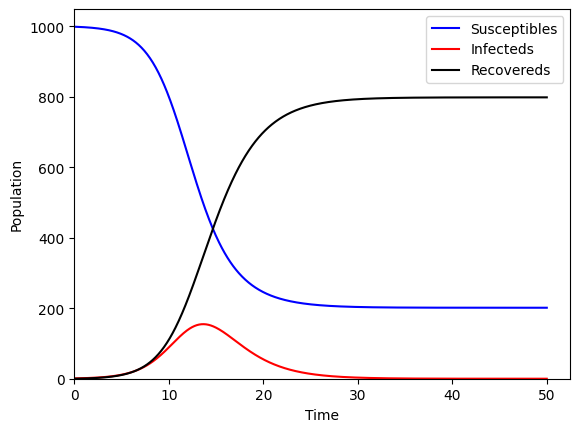

In [12]:
# def SIR(S0, I0, R0, beta, gamma, t_max, step_size):
S,I,R,T = SIR(999, 1, 0,
              1, 0.5, 50, 0.05)

fig, ax = plt.subplots()
ax.plot(T, S, color='b',label='Susceptibles')
ax.plot(T, I, color='r',label ='Infecteds' )
ax.plot(T, R, color='k',label='Recovereds')
ax.set_xlabel('Time')
ax.set_ylabel('Population')
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)
ax.legend()

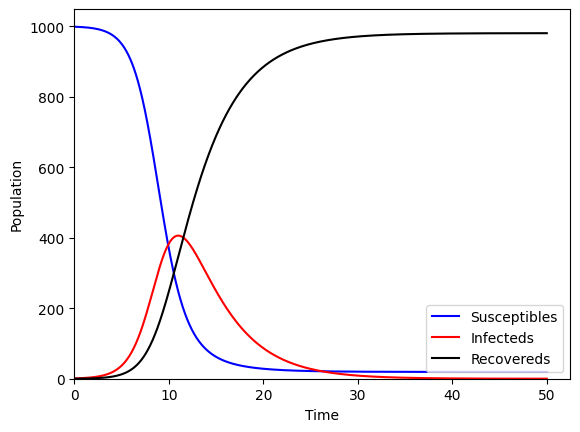

In [13]:
# def SIR(S0, I0, R0, beta, gamma, t_max, step_size):
S,I,R,T = SIR(999, 1, 0,
              1, 0.25, 50, 0.05)

fig, ax = plt.subplots()
ax.plot(T, S, color='b',label='Susceptibles')
ax.plot(T, I, color='r',label ='Infecteds' )
ax.plot(T, R, color='k',label='Recovereds')
ax.set_xlabel('Time')
ax.set_ylabel('Population')
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)
ax.legend()

## Equilibria

Equil: nothing is changing
(values of variables (NOT params) where nothing is changing)

$$\dot{S} = 0$$
$$\dot{I} = 0$$
$$\dot{R} = 0$$

$$\dot{R} = \gamma I = 0$$

Therefore: $I_{eq} = 0$

$$\dot{S} = \frac{-\beta S I}{N} = 0$$
$$\dot{I} = \frac{\beta S I}{N} - \gamma I = 0$$
$$\dot{R} = \gamma I = 0$$

I know that:

$$S_{eq} + I_{eq} + R_{eq} = N$$
$$S_{eq} + 0 + R_{eq} = N$$
$$S_{eq} + R_{eq} = N$$

$$(S,I,R)_{eq} = (S_{eq}, 0, N - S_{eq})$$

or 

$$(N - R_{eq}, 0, R_{eq})$$

This is also referred to as "disease-free equilibrium".

This is contrasted by the "endemic equilibrium", where the disease persists in the population.

In the SIR model, the only state of equilibrium is the disease-free equilibrium, where $I_{eq} = 0$.

## Will there be an epidemic?

Is $\dot{I} > 0$?

If $\dot{I} \leq 0$, then there will be no epidemic.

$$\dot{I} = \frac{\beta S I}{N} - \gamma I > 0$$

I > 0 by assumption

$$I (\frac{\beta S}{N} - \gamma) > 0$$
Divide both sides by $I$ (which is positive):

$$\frac{\beta S}{N} - \gamma > 0$$

Rearranging gives:

$$\frac{\beta S}{N} > \gamma$$

or

$$\frac{\beta}{N} S > \gamma$$

This is the condition for an epidemic to occur.

So $S > \frac{\gamma}{\beta}$

If this condition is met, then there will be an epidemic.

But if this condition is not met, then there will be no epidemic.

If you can reduce fraction of susceptible population low enough, then the epidemic will die out.
This is called **herd immunity**.


$\gamma$ = recovery rate

$\beta$ = contact rate, but also the transmission rate of the disease per contact

So flattening the curve in context of the 2020 pandemic means reducing $\beta$ by implementing social distancing measures, wearing masks, and other interventions to decrease the number of contacts and the likelihood of transmission.


## Basic Reproductive Number

$R_0$ "R naught" is the **expected** number of secondary infections caused by a single primary infected individual in an otherwise **completely susceptible** population.

$R_0 > 1$ indicates that the infection will spread in the population, while $R_0 < 1$ indicates that the infection will die out.
